# Travelling Companions

In this activity you will be taking three separate csvs that were gathered by Tourism Malaysia, merging them together, and then creating charts to visualise a country's change of travelling companions to Malaysia over the course of three years.

### Part 1 - Merging Companions

* You will likely need to perform two different merges over the course of this activity, changing the names of your columns as you go along.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Take in all of our traveller data and read it into pandas
filepath = "~/Documents/PythonProjects/DataBootcamp/Lesson_14/"
df_2016 = pd.read_csv(filepath + "2016_travellers.csv")
df_2017 = pd.read_csv(filepath + "2017_travellers.csv")
df_2018 = pd.read_csv(filepath + "2018_travellers.csv")

In [4]:
df_2016.head()

,COUNTRY OF NATIONALITY,ALONE,WITH SPOUSE,WITH CHILDREN,WITH FAMILY/RELATIVES,STUDENT GROUP,WITH FRIENDS,WITH BUSINESS ACCOCIATE,WITH INCENTIVE GROUP,OTHERS
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5


In [5]:
df_2017.head()

,COUNTRY OF NATIONALITY,ALONE,WITH SPOUSE,WITH CHILDREN,WITH FAMILY/RELATIVES,STUDENT GROUP,WITH FRIENDS,WITH BUSINESS ACCOCIATE,WITH INCENTIVE GROUP,OTHERS
0,SINGAPORE,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [11]:
df_2018.head()

,COUNTRY OF NATIONALITY,ALONE,WITH SPOUSE,WITH CHILDREN,WITH FAMILY/RELATIVES,STUDENT GROUP,WITH FRIENDS,WITH BUSINESS ACCOCIATE,WITH INCENTIVE GROUP,OTHERS
0,SINGAPORE,16.9,34.6,5.0,25.3,0.7,14.4,0.6,2.5,0.1
1,THAILAND,20.6,6.7,7.2,33.5,1.2,29.8,0.4,0.4,0.2
2,INDONESIA,11.3,31.1,4.0,34.4,1.1,14.7,0.7,2.3,0.5
3,BRUNEI,17.5,28.1,2.0,40.0,0.1,11.6,0.4,0.1,0.1
4,PHILIPPINES,5.5,20.6,0.7,29.5,0.5,39.2,1.6,1.6,0.7


In [6]:
# Merge the first two datasets on "COUNTRY OF NATIONALITY" so that no data is lost (should be 44 rows)
merge1 = pd.merge(df_2016, df_2017, on="COUNTRY OF NATIONALITY", how="outer")
merge1.head()

,COUNTRY OF NATIONALITY,ALONE_x,WITH SPOUSE_x,WITH CHILDREN_x,WITH FAMILY/RELATIVES_x,STUDENT GROUP_x,WITH FRIENDS_x,WITH BUSINESS ACCOCIATE_x,WITH INCENTIVE GROUP_x,OTHERS_x,ALONE_y,WITH SPOUSE_y,WITH CHILDREN_y,WITH FAMILY/RELATIVES_y,STUDENT GROUP_y,WITH FRIENDS_y,WITH BUSINESS ACCOCIATE_y,WITH INCENTIVE GROUP_y,OTHERS_y
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [8]:
# Rename our _x columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"

merge1_renamed = merge1.rename(columns={
    "ALONE_x": "2016 Alone",
    "WITH SPOUSE_x": "2016 With Spouse",
    "WITH CHILDREN_x": "2016 With Children",
    "WITH FAMILY/RELATIVES_x": "2016 With Family/Relatives",
    "STUDENT GROUP_x": "2016 Student Group",
    "WITH FRIENDS_x": "2016 With Friends",
    "WITH BUSINESS ACCOCIATE_x": "2016 With Business Associate",
    "WITH INCENTIVE GROUP_x": "2016 With Incentive Group",
    "OTHERS_x": "2016 Others"
})
merge1_renamed.head()


,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,ALONE_y,WITH SPOUSE_y,WITH CHILDREN_y,WITH FAMILY/RELATIVES_y,STUDENT GROUP_y,WITH FRIENDS_y,WITH BUSINESS ACCOCIATE_y,WITH INCENTIVE GROUP_y,OTHERS_y
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [10]:
# Rename our _y columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"

merge1_renamed = merge1_renamed.rename(columns={
    "ALONE_y": "2017 Alone",
    "WITH SPOUSE_y": "2017 With Spouse",
    "WITH CHILDREN_y": "2017 With Children",
    "WITH FAMILY/RELATIVES_y": "2017 With Family/Relatives",
    "STUDENT GROUP_y": "2017 Student Group",
    "WITH FRIENDS_y": "2017 With Friends",
    "WITH BUSINESS ACCOCIATE_y": "2017 With Business Associate",
    "WITH INCENTIVE GROUP_y": "2017 With Incentive Group",
    "OTHERS_y": "2017 Others"
})
merge1_renamed.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,2017 Alone,2017 With Spouse,2017 With Children,2017 With Family/Relatives,2017 Student Group,2017 With Friends,2017 With Business Associate,2017 With Incentive Group,2017 Others
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [14]:
# Merge our newly combined dataframe with the 2018 dataframe
merge2 = pd.merge(merge1_renamed, df_2018, on="COUNTRY OF NATIONALITY", how="outer")
merge2.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,...,2017 Others,ALONE,WITH SPOUSE,WITH CHILDREN,WITH FAMILY/RELATIVES,STUDENT GROUP,WITH FRIENDS,WITH BUSINESS ACCOCIATE,WITH INCENTIVE GROUP,OTHERS
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,...,0.5,16.9,34.6,5.0,25.3,0.7,14.4,0.6,2.5,0.1
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,...,1.8,20.6,6.7,7.2,33.5,1.2,29.8,0.4,0.4,0.2
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,...,1.4,11.3,31.1,4.0,34.4,1.1,14.7,0.7,2.3,0.5
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,...,0.0,17.5,28.1,2.0,40.0,0.1,11.6,0.4,0.1,0.1
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,...,0.2,5.5,20.6,0.7,29.5,0.5,39.2,1.6,1.6,0.7


In [15]:
# Rename "ALONE", "WITH SPOUSE", "WITH CHILDREN", "WITH FAMILY/RELATIVES", "STUDENT GROUP", "WITH FRIENDS",
# "WITH BUSINESS ACCOCIATE","WITH INCENTIVE GROUP", "OTHERS" to 
# "2018 Alone", "2018 With Spouse", "2018 With Children", "2018 With Family/Relatives", "2018 Student Group", 
# "2018 With Friends", "2018 With Business Associate", "2018 With Incentive Group", and "2018 Others"

merge2_renamed = merge2.rename(columns={
    "ALONE": "2018 Alone",
    "WITH SPOUSE": "2018 With Spouse",
    "WITH CHILDREN": "2018 With Children",
    "WITH FAMILY/RELATIVES": "2018 With Family/Relatives",
    "STUDENT GROUP": "2018 Student Group",
    "WITH FRIENDS": "2018 With Friends",
    "WITH BUSINESS ACCOCIATE": "2018 With Business Associate",
    "WITH INCENTIVE GROUP": "2018 With Incentive Group",
    "OTHERS": "2018 Others"
})
merge2_renamed.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,...,2017 Others,2018 Alone,2018 With Spouse,2018 With Children,2018 With Family/Relatives,2018 Student Group,2018 With Friends,2018 With Business Associate,2018 With Incentive Group,2018 Others
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,...,0.5,16.9,34.6,5.0,25.3,0.7,14.4,0.6,2.5,0.1
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,...,1.8,20.6,6.7,7.2,33.5,1.2,29.8,0.4,0.4,0.2
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,...,1.4,11.3,31.1,4.0,34.4,1.1,14.7,0.7,2.3,0.5
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,...,0.0,17.5,28.1,2.0,40.0,0.1,11.6,0.4,0.1,0.1
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,...,0.2,5.5,20.6,0.7,29.5,0.5,39.2,1.6,1.6,0.7


In [16]:
# Check the mean of the columns
col_means = merge2_renamed.mean()
print(col_means)

2016 Alone                      15.890909
2016 With Spouse                34.202273
2016 With Children               1.275000
2016 With Family/Relatives      20.434091
2016 Student Group               0.715909
2016 With Friends               20.300000
2016 With Business Associate     3.088636
2016 With Incentive Group        1.065909
2016 Others                      0.768182
2017 Alone                      12.447727
2017 With Spouse                32.413636
2017 With Children               1.184091
2017 With Family/Relatives      27.325000
2017 Student Group               0.647727
2017 With Friends               22.202273
2017 With Business Associate     1.663636
2017 With Incentive Group        0.995455
2017 Others                      1.106818
2018 Alone                       7.477273
2018 With Spouse                31.693182
2018 With Children               1.325000
2018 With Family/Relatives      28.638636
2018 Student Group               1.179545
2018 With Friends               25

C:\Users\kalio\AppData\Local\Temp\ipykernel_22372\879211091.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_means = merge2_renamed.mean()


In [36]:
#Reduce the columns to only those where the mean of travelling companions is >1 across all years.
col_means_low = col_means[col_means < 1]
col_means_low = col_means_low.keys()
col_means_low = col_means_low.tolist()

col_names = []

for i in col_means_low:
    col_names.append(i[5:])

col_names = set(col_names)
col_names = list(col_names)
col_names

['With Incentive Group', 'Student Group', 'Others']

In [45]:
#List column headings that contain the values from col_names
col1 = merge2_renamed.filter(regex=col_names[0], axis="columns")
col2 = merge2_renamed.filter(regex=col_names[1], axis="columns")
col3 = merge2_renamed.filter(regex=col_names[2], axis="columns")

col_names_to_remove = pd.concat([col1, col2, col3], axis=1)

col_names_to_remove = col_names_to_remove.keys()
col_names_to_remove = col_names_to_remove.tolist()
col_names_to_remove

['2016 With Incentive Group',
 '2017 With Incentive Group',
 '2018 With Incentive Group',
 '2016 Student Group',
 '2017 Student Group',
 '2018 Student Group',
 '2016 Others',
 '2017 Others',
 '2018 Others']

In [46]:
#Remove these column headings from the dataset
for x in col_names_to_remove:
    del merge2_renamed[x]

merge2_renamed.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 With Friends,2016 With Business Associate,2017 Alone,2017 With Spouse,2017 With Children,2017 With Family/Relatives,2017 With Friends,2017 With Business Associate,2018 Alone,2018 With Spouse,2018 With Children,2018 With Family/Relatives,2018 With Friends,2018 With Business Associate
0,SINGAPORE,18.6,35.5,3.9,23.7,14.7,2.2,20.6,39.4,5.9,22.9,9.3,1.1,16.9,34.6,5.0,25.3,14.4,0.6
1,THAILAND,30.1,16.7,0.9,12.0,30.2,4.8,23.2,17.8,4.2,11.8,29.3,4.8,20.6,6.7,7.2,33.5,29.8,0.4
2,INDONESIA,12.9,24.6,3.8,37.9,14.9,2.1,10.4,28.0,3.9,34.9,15.5,2.7,11.3,31.1,4.0,34.4,14.7,0.7
3,BRUNEI,10.2,24.9,2.2,44.5,16.2,1.1,6.8,21.2,2.2,54.5,14.2,0.8,17.5,28.1,2.0,40.0,11.6,0.4
4,PHILIPPINES,13.9,27.5,1.5,15.0,34.1,1.1,3.5,7.6,0.2,40.0,46.4,1.9,5.5,20.6,0.7,29.5,39.2,1.6


In [47]:
#Set index to country of nationality
country_df = merge2_renamed.set_index("COUNTRY OF NATIONALITY")
country_df.head()

,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 With Friends,2016 With Business Associate,2017 Alone,2017 With Spouse,2017 With Children,2017 With Family/Relatives,2017 With Friends,2017 With Business Associate,2018 Alone,2018 With Spouse,2018 With Children,2018 With Family/Relatives,2018 With Friends,2018 With Business Associate
COUNTRY OF NATIONALITY,,,,,,,,,,,,,,,,,,
SINGAPORE,18.6,35.5,3.9,23.7,14.7,2.2,20.6,39.4,5.9,22.9,9.3,1.1,16.9,34.6,5.0,25.3,14.4,0.6
THAILAND,30.1,16.7,0.9,12.0,30.2,4.8,23.2,17.8,4.2,11.8,29.3,4.8,20.6,6.7,7.2,33.5,29.8,0.4
INDONESIA,12.9,24.6,3.8,37.9,14.9,2.1,10.4,28.0,3.9,34.9,15.5,2.7,11.3,31.1,4.0,34.4,14.7,0.7
BRUNEI,10.2,24.9,2.2,44.5,16.2,1.1,6.8,21.2,2.2,54.5,14.2,0.8,17.5,28.1,2.0,40.0,11.6,0.4
PHILIPPINES,13.9,27.5,1.5,15.0,34.1,1.1,3.5,7.6,0.2,40.0,46.4,1.9,5.5,20.6,0.7,29.5,39.2,1.6


In [56]:
#Save the data for 3 countries to chart
aus = country_df.loc["AUSTRALIA"]
thai = country_df.loc["THAILAND"]
phil = country_df.loc["PHILIPPINES"]

In [57]:
#Set the type of travelling companion
spouse = "Spouse"

In [60]:
#Set a series for each chosen country that contains only spouse values
aus_spouse = country_df.filter(regex=spouse, axis="columns").loc["AUSTRALIA"]
thai_spouse = country_df.filter(regex=spouse, axis="columns").loc["THAILAND"]
phil_spouse = country_df.filter(regex=spouse, axis="columns").loc["PHILIPPINES"]

In [74]:
#Create a list of the years for the x axis
col_all = country_df.keys().tolist()

years_all = []
for z in col_all:
    years_all.append(int(z[:4]))


years_unique = set(years_all)
years_unique = list(years_unique)
years_unique

[2016, 2017, 2018]

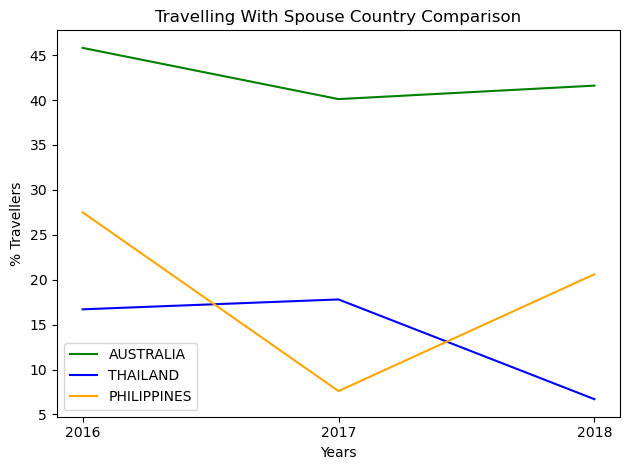

In [77]:
#Plot the line for each country
aus_line = plt.plot(years_unique, aus_spouse, color="green", label="AUSTRALIA")
thai_line = plt.plot(years_unique, thai_spouse, color="blue", label="THAILAND")
phil_line = plt.plot(years_unique, phil_spouse, color="orange", label="PHILIPPINES")

#X tick locations and labels
tick_locations = [q for q in years_unique]
plt.xticks(tick_locations, years_unique)

#Place a legend in the best location
plt.legend(loc="best")

#Add a title and axis labels
plt.title("Travelling With Spouse Country Comparison")
plt.xlabel("Years")
plt.ylabel("% Travellers")

#Save and display the plot
plt.tight_layout()
plt.savefig("Travelling_Companions_Output.png")
plt.show()
